In [1]:
from sklearn.model_selection import train_test_split

In [2]:
from catboost import CatBoostRegressor, Pool

In [3]:
import shap

shap.initjs()

Links:
- https://towardsdatascience.com/why-you-should-learn-catboost-now-390fb3895f76
- https://github.com/catboost/tutorials/blob/master/model_analysis/shap_values_tutorial.ipynb
- https://towardsdatascience.com/interpreting-your-deep-learning-model-by-shap-e69be2b47893

In [4]:
X, y = shap.datasets.diabetes()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
model = CatBoostRegressor(iterations=500)

In [19]:
# you will need Node.js and jupyter lab extension, but it is possible to visualise a plot of the internals 
# of CatBoost adding plot=True to the call below

model.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.057581
0:	learn: 73.8019170	test: 79.3379238	best: 79.3379238 (0)	total: 2.46ms	remaining: 1.23s
1:	learn: 72.3902879	test: 78.1516181	best: 78.1516181 (1)	total: 4.39ms	remaining: 1.09s
2:	learn: 70.8059738	test: 76.8391772	best: 76.8391772 (2)	total: 5.63ms	remaining: 932ms
3:	learn: 69.3412755	test: 75.6810900	best: 75.6810900 (3)	total: 6.6ms	remaining: 819ms
4:	learn: 67.9634708	test: 74.3073416	best: 74.3073416 (4)	total: 7.94ms	remaining: 786ms
5:	learn: 66.8637982	test: 73.2945318	best: 73.2945318 (5)	total: 9.89ms	remaining: 814ms
6:	learn: 65.8405526	test: 72.3927978	best: 72.3927978 (6)	total: 11.7ms	remaining: 824ms
7:	learn: 64.9179054	test: 71.5914600	best: 71.5914600 (7)	total: 13.1ms	remaining: 808ms
8:	learn: 63.7773002	test: 70.6460852	best: 70.6460852 (8)	total: 14.7ms	remaining: 804ms
9:	learn: 62.7358971	test: 69.8613541	best: 69.8613541 (9)	total: 16.7ms	remaining: 818ms
10:	learn: 61.8124982	test: 69.1115801	best: 69.1115801 (10)	total: 18.

# Model Analysis

In [8]:
shap_values = model.get_feature_importance(Pool(X, y), type='ShapValues')

In [9]:
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

In [10]:
# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[5,:], X.iloc[5,:])

In [11]:
shap.force_plot(expected_value, shap_values, X)

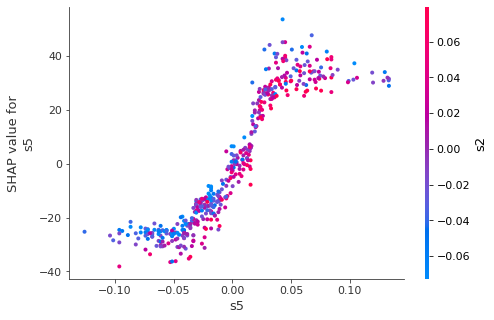

In [12]:
shap.dependence_plot("s5", shap_values, X)

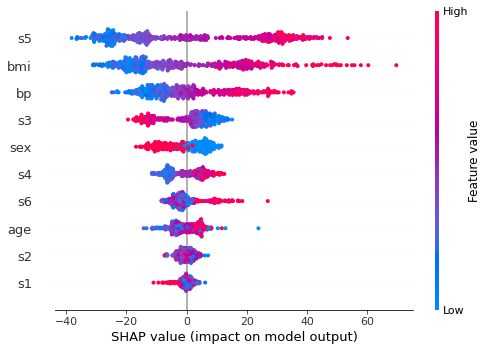

In [13]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)